In [5]:
import pandas as pd
import numpy as np
from loguru import logger

# Plot loss and validity curves in epochs

200 200


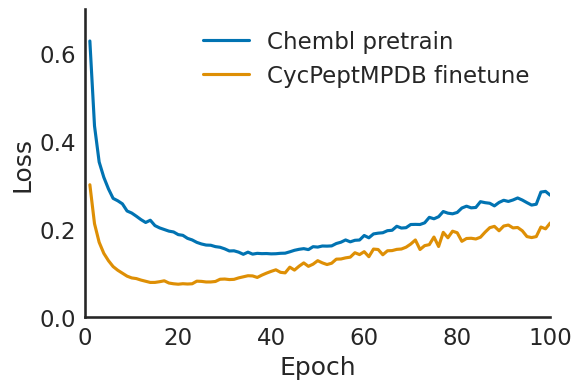

In [8]:
from utils import plot_style_utils

loss_chembl = pd.read_csv('result/prior/loss_chembl_5.0.csv')
loss_cycpeptpdb_tune = pd.read_csv('result/prior/loss_cycpeptpdb_tune_5.0.csv')

print(len(loss_chembl), len(loss_cycpeptpdb_tune))

fig, ax = plot_style_utils.simple_ax()
plot_style_utils.set_pub_plot_context(context="talk")
plot_style_utils.prettify_ax(ax)


ax.plot(loss_chembl['Step'], loss_chembl['Value'], label='Chembl pretrain', color=plot_style_utils.CAT_PALETTE[0])
ax.plot(loss_cycpeptpdb_tune['Step'], loss_cycpeptpdb_tune['Value'], label='CycPeptMPDB finetune', color=plot_style_utils.CAT_PALETTE[1])
ax.set_xlim(0, 100)
ax.set_ylim(0, 0.7)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend(loc='upper right', frameon=False)
plot_style_utils.save_for_pub(fig=fig, path='figures/cpp/prior_loss')

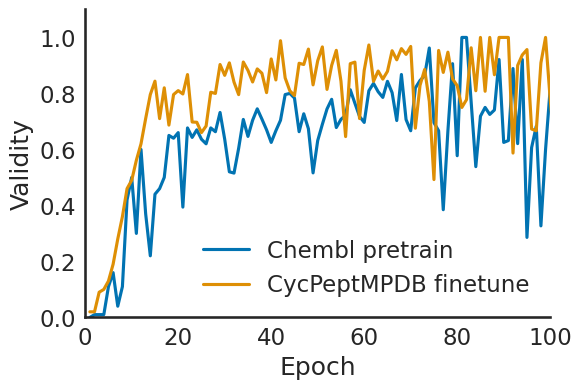

In [9]:
validity_chembl = pd.read_csv('result/prior/valid_chembl_5.0.csv')
validity_cycpeptpdb_tune = pd.read_csv('result/prior/valid_cycpeptpdb_tune_5.0.csv')

fig, ax = plot_style_utils.simple_ax()
plot_style_utils.set_pub_plot_context(context="talk")
plot_style_utils.prettify_ax(ax)

ax.plot(validity_chembl['Step'], validity_chembl['Value'], label='Chembl pretrain', color=plot_style_utils.CAT_PALETTE[0])
ax.plot(validity_cycpeptpdb_tune['Step'], validity_cycpeptpdb_tune['Value'], label='CycPeptMPDB finetune', color=plot_style_utils.CAT_PALETTE[1])
ax.set_xlim(0, 100)
ax.set_ylim(0, 1.1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Validity')
ax.legend(loc='lower right', frameon=False)

plot_style_utils.save_for_pub(fig=fig, path='figures/cpp/prior_validity')

# Permeability

In [2]:
import pickle

with open('result/prior/cpp_permeability.pkl', 'rb') as f:
    train_1k_perm, prior_1k_perm, prior_cpp_tune_1k_perm = pickle.load(f)

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


x range: -10.0 -4.520066666666668


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


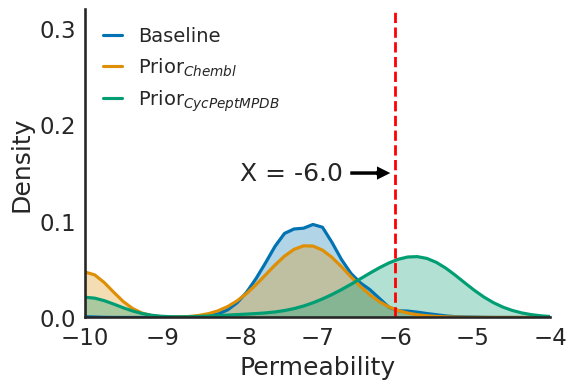

In [4]:
from utils import plot_style_utils
import scipy.stats as stats
import numpy as np


fig, ax = plot_style_utils.simple_ax()
plot_style_utils.set_pub_plot_context(context="talk")
plot_style_utils.prettify_ax(ax)

x_min = min(np.min(train_1k_perm), np.min(prior_1k_perm), np.min(prior_cpp_tune_1k_perm))
x_max = max(np.max(train_1k_perm), np.max(prior_1k_perm), np.max(prior_cpp_tune_1k_perm))

print('x range:', x_min, x_max)
x = np.linspace(-10, -4, 50)

y1 = stats.gaussian_kde(train_1k_perm)(x)/sum(stats.gaussian_kde(train_1k_perm)(x))
ax.plot(x, y1, color=plot_style_utils.CAT_PALETTE[0], label='Baseline')
ax.fill_between(x, 0, y1, alpha=0.3, color=plot_style_utils.CAT_PALETTE[0])

y2 = stats.gaussian_kde(prior_1k_perm)(x)/sum(stats.gaussian_kde(prior_1k_perm)(x))
ax.plot(x, y2, color=plot_style_utils.CAT_PALETTE[1], label='Prior$_{Chembl}$')
ax.fill_between(x, 0, y2, alpha=0.3, color=plot_style_utils.CAT_PALETTE[1])

y3 = stats.gaussian_kde(prior_cpp_tune_1k_perm)(x)/sum(stats.gaussian_kde(prior_cpp_tune_1k_perm)(x))
ax.plot(x, y3, color=plot_style_utils.CAT_PALETTE[2], label='Prior$_{CycPeptMPDB}$')
ax.fill_between(x, 0, y3, alpha=0.3, color=plot_style_utils.CAT_PALETTE[2])

ax.legend(loc='upper left', frameon=False, fontsize=14, handlelength=1)
ax.set_xlim(-10, -4)
ax.set_ylim(0, 0.32)
ax.set_xlabel('Permeability')
ax.set_ylabel('Density')

# draw vertical lines from x=-6.0
ax.vlines(x=-6.0, ymin=0, ymax=0.32, color='red', linestyle='--', linewidth=2)
ax.annotate('X = -6.0', xy=(-6.0, 0.15), xytext=(-8.0, 0.15), verticalalignment="center",
            arrowprops=dict(facecolor='black', shrink=0.05))

plot_style_utils.save_for_pub(fig=fig, path='figures/cpp/prior_perm')

# Agents

In [10]:
import pickle

with open('result/agent/cpp/cpp_agent_permeability.pkl', 'rb') as f:
    final_prior_1k_perm, agent_1k_perm, final_prior_1k_sa, agent_1k_sa = pickle.load(f)

x range: -10.0 -4.369649999999997


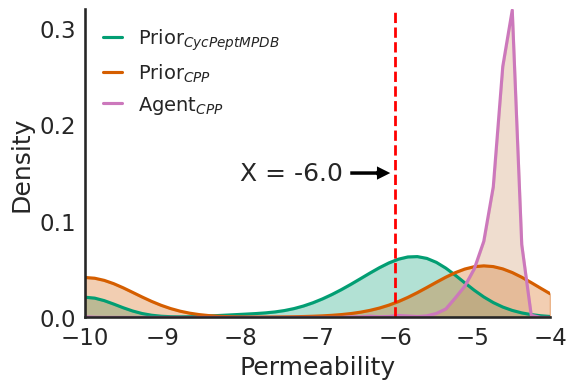

In [11]:
## Plot Permeability distribution curves
from utils import plot_style_utils
import scipy.stats as stats

fig, ax = plot_style_utils.simple_ax()
plot_style_utils.set_pub_plot_context(context="talk")
plot_style_utils.prettify_ax(ax)

x_min = min(np.min(prior_cpp_tune_1k_perm), np.min(final_prior_1k_perm), np.min(agent_1k_perm))
x_max = max(np.max(prior_cpp_tune_1k_perm), np.max(final_prior_1k_perm), np.max(agent_1k_perm))

print('x range:', x_min, x_max)
x = np.linspace(-10, -4, 50)

y1 = stats.gaussian_kde(prior_cpp_tune_1k_perm)(x)/sum(stats.gaussian_kde(prior_cpp_tune_1k_perm)(x))
ax.plot(x, y1, color=plot_style_utils.CAT_PALETTE[2], label='Prior$_{CycPeptMPDB}$')
ax.fill_between(x, 0, y1, alpha=0.3, color=plot_style_utils.CAT_PALETTE[2])

y2 = stats.gaussian_kde(final_prior_1k_perm)(x)/sum(stats.gaussian_kde(final_prior_1k_perm)(x))
ax.plot(x, y2, color=plot_style_utils.CAT_PALETTE[3], label='Prior$_{CPP}$')
ax.fill_between(x, 0, y2, alpha=0.3, color=plot_style_utils.CAT_PALETTE[3])

y3 = stats.gaussian_kde(agent_1k_perm)(x)/sum(stats.gaussian_kde(agent_1k_perm)(x))
ax.plot(x, y3, color=plot_style_utils.CAT_PALETTE[4], label='Agent$_{CPP}$')
ax.fill_between(x, 0, y3, alpha=0.3, color=plot_style_utils.CAT_PALETTE[5])

# draw vertical lines from x=-6.0
ax.vlines(x=-6.0, ymin=0, ymax=0.32, color='red', linestyle='--', linewidth=2)
ax.annotate('X = -6.0', xy=(-6.0, 0.15), xytext=(-8.0, 0.15), verticalalignment="center",
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.legend(loc='upper left', frameon=False, fontsize=14, handlelength=1)
ax.set_xlim(-10, -4)
ax.set_ylim(0.00, 0.32)
ax.set_xlabel('Permeability')
ax.set_ylabel('Density')

plot_style_utils.save_for_pub(fig=fig, path='figures/cpp/agent_perm')